## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



**Import the required Libraries**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [12]:
df = pd.read_csv("data/boston_house_prices.csv", header = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Data preprocessing**

Check for missing values in all the columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

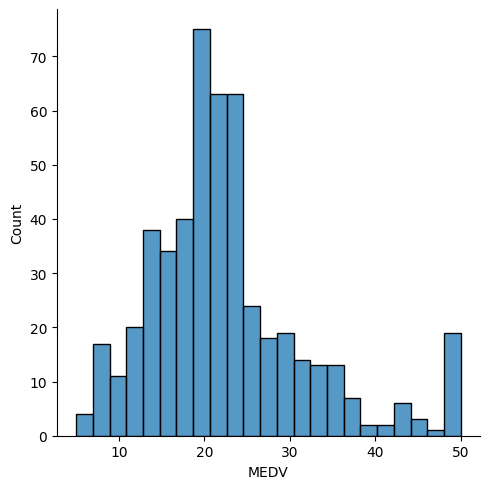

In [18]:
sns.displot(df["MEDV"])

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

<Axes: >

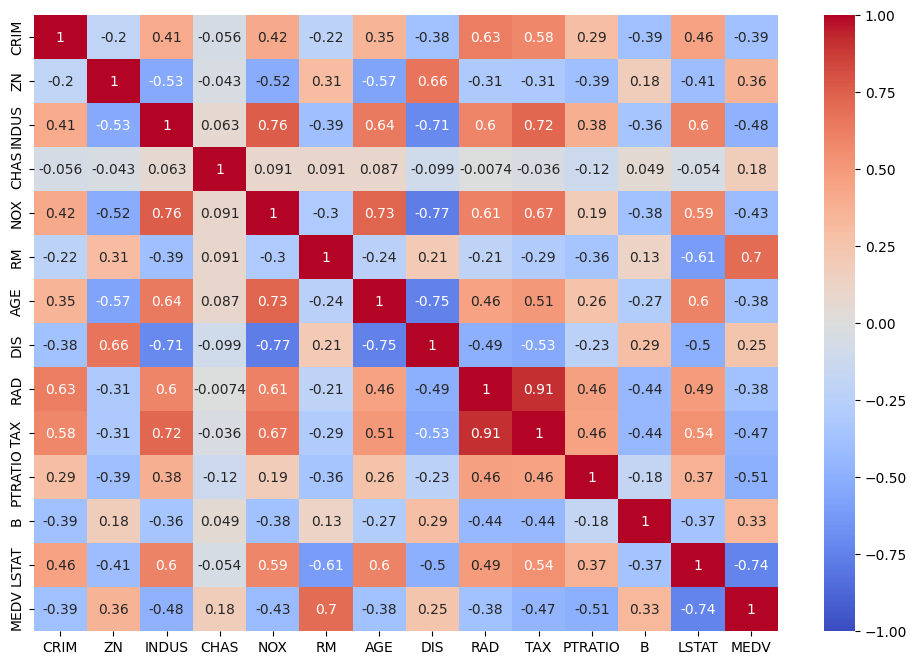

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot= True, vmin=-1, cmap="coolwarm")

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='RM', ylabel='MEDV'>

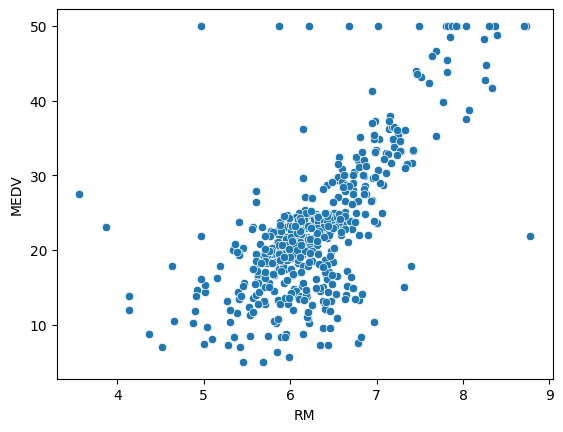

In [22]:
sns.scatterplot(x=df["RM"], y= df["MEDV"])

<Axes: xlabel='LSTAT', ylabel='MEDV'>

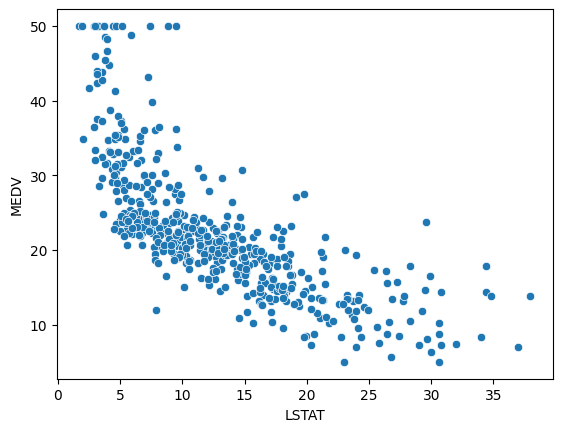

In [23]:
sns.scatterplot(x=df["LSTAT"], y= df["MEDV"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [24]:
X = df[["RM", "LSTAT"]]
y = df["MEDV"]

In [25]:
X

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [26]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [ ]:
df.des

In [33]:
pred_train = linear_model.predict(X_train)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_train))
print("RMSE: ", metrics.root_mean_squared_error(y_train, pred_train))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, pred_train))
print("R2: ", metrics.r2_score(y_train, pred_train))
print("________________")
pred = linear_model.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("R2: ", metrics.r2_score(y_test, pred))

MAE:  3.9053173492810562
RMSE:  5.437521296805657
MAPE:  0.20993403045386663
R2:  0.6479331247578014
________________
MAE:  4.144150092752622
RMSE:  5.877603606790933
MAPE:  0.21053311762177843
R2:  0.5973526600916157


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<Axes: xlabel='MEDV'>

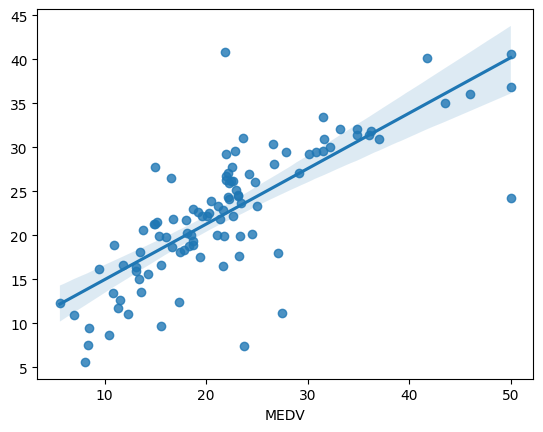

In [34]:
sns.regplot(x = y_test, y = pred)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [39]:
reg_pol = PolynomialFeatures(degree=2)
reg_pol.fit(X_train)


PolynomialFeatures()

In [40]:
X_train_poly = reg_pol.transform(X_train)
X_test_poly = reg_pol.transform(X_test)

In [41]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


LinearRegression()

**Did the model improve using the Polynomial model?**

In [42]:
print("___________TRAIN___________")
pred_poly_train = lm.predict(X_train_poly)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_poly_train))
print("RMSE: ", metrics.root_mean_squared_error(y_train, pred_poly_train))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, pred_poly_train))
print("R2: ", metrics.r2_score(y_train, pred_poly_train))

print("___________TEST___________")
pred_poly = lm.predict(X_test_poly)
print("MAE: ", metrics.mean_absolute_error(y_test, pred_poly))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred_poly))
print("R2: ", metrics.r2_score(y_test, pred_poly))

___________TRAIN___________
MAE:  3.0279053894021195
RMSE:  4.193462229114646
MAPE:  0.1578811206724713
R2:  0.7906038486807723
___________TEST___________
MAE:  3.5070854447508077
RMSE:  5.819267299965158
MAPE:  0.17384665535747326
R2:  0.6053056947598755


**Did the model improve using the Polynomial model with degree 3? Or more?**

In [43]:
reg_pol = PolynomialFeatures(degree=3)
reg_pol.fit(X_train)
X_train_poly = reg_pol.transform(X_train)
X_test_poly = reg_pol.transform(X_test)
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


print("___________TRAIN___________")
pred_poly_train = lm.predict(X_train_poly)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_poly_train))
print("RMSE: ", metrics.root_mean_squared_error(y_train, pred_poly_train))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, pred_poly_train))
print("R2: ", metrics.r2_score(y_train, pred_poly_train))

print("___________TEST___________")
pred_poly = lm.predict(X_test_poly)
print("MAE: ", metrics.mean_absolute_error(y_test, pred_poly))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred_poly))
print("R2: ", metrics.r2_score(y_test, pred_poly))

___________TRAIN___________
MAE:  2.899717733836818
RMSE:  4.000401508775109
MAPE:  0.153528021813984
R2:  0.8094405947635454
___________TEST___________
MAE:  3.7736971507225423
RMSE:  6.582683124879292
MAPE:  0.19162928973133447
R2:  0.4949549174177533


In [51]:
def metricas_reg( y_test, test_pred):

    print("___________TEST___________")
    print("MAE: ", metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE: ", metrics.root_mean_squared_error(y_test, test_pred))
    print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, test_pred))
    print("R2: ", metrics.r2_score(y_test, test_pred))

In [49]:
def polynomial(grado, X_train, X_test):
    reg_pol = PolynomialFeatures(degree=grado)
    reg_pol.fit(X_train)
    X_train_poly = reg_pol.transform(X_train)
    X_test_poly = reg_pol.transform(X_test)
    return X_train_poly, X_test_poly

def linear(X_train, y_train, X_test):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    pred = lm.predict(X_test)
    return pred


In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 1_ Regresión lineal
pred_linear = linear(X_train, y_train, X_test)
metricas_reg(y_test, pred_linear)


# 2_poly de 2
X_train_poly, X_test_poly = polynomial(4, X_train, X_test)
pred_poly = linear(X_train_poly, y_train, X_test_poly)
metricas_reg(y_test, pred_poly)

(404, 2)
(404,)
(102, 2)
(102,)
___________TEST___________
MAE:  4.144150092752622
RMSE:  5.877603606790933
MAPE:  0.21053311762177843
R2:  0.5973526600916157
___________TEST___________
MAE:  3.950846888980705
RMSE:  8.055070482066247
MAPE:  0.19653921639471783
R2:  0.24375426686438006
